# Exercise 1 (10 points)

In this exercise, we will practice how to properly format code. You are given a simple but poorly formatted Python code snippet that performs some common data science tasks (loading data, cleaning, and basic analysis). Your task is to refactor the code to improve readability, organization, and adhere to Python"s PEP8 formatting guidelines.

```
import pandas as pd 
import numpy as np

data=pd.read_csv("credit_risk_dataset.csv")
# drop rows with missing values
data=data.dropna()

cat_cols = ["person_home_ownership", "loan_intent", "loan_grade", "cb_person_default_on_file"]
def converting_datatypes(df, cat_cols, df_train=False):
    
    for col in cat_cols:
        df[col] = df[col].astype("category")
    
    df["person_age"] = df["person_age"].astype("int32")
    df["cb_person_cred_hist_length"] = df["cb_person_cred_hist_length"].astype("int32") 
    
    if df_train==True:

        df["loan_status"] = df["loan_status"].astype("int8")
        
    return df
        
data = converting_datatypes(data, cat_cols, df_train=True)

X=data.drop("loan_status",axis=1)
y=data["loan_status"]

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

from sklearn.ensemble import HistGradientBoostingClassifier
hg=HistGradientBoostingClassifier(n_estimators=100, categorical_features="from_dtype")
hg.fit(X_train,y_train)
print("Train accuracy:",hg.score(X_train,y_train))
print("Test accuracy:",hg.score(X_test,y_test))
```

In [1]:
import pandas as pd 

from sklearn.model_selection import train_test_split
from sklearn.ensemble import HistGradientBoostingClassifier

# load dataset
data = pd.read_csv("credit_risk_dataset.csv")

# drop rows with missing values
data = data.dropna()

# define categorical columns
cat_cols = ["person_home_ownership", 
            "loan_intent", 
            "loan_grade", 
            "cb_person_default_on_file"]


def converting_datatypes(df, cat_cols, df_train=False):
    
    for col in cat_cols:
        df[col] = df[col].astype("category")
    
    df["person_age"] = df["person_age"].astype("int32")
    df["cb_person_cred_hist_length"] = df["cb_person_cred_hist_length"].astype("int32") 
    
    if df_train == True:

        df["loan_status"] = df["loan_status"].astype("int8")
        
    return df
        
# convert data types        
data = converting_datatypes(data, cat_cols, df_train = True)

# define the features and target
X = data.drop("loan_status", axis=1)
y = data["loan_status"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# define the model
hg=HistGradientBoostingClassifier(max_iter = 100, categorical_features="from_dtype")

# train the model
hg.fit(X_train,y_train)

# evaluate the model
train_accuracy = hg.score(X_train,y_train)
test_accuracy = hg.score(X_test,y_test)

print("Train accuracy:", train_accuracy)
print("Test accuracy:", test_accuracy)

Train accuracy: 0.9430809138980345
Test accuracy: 0.930633147113594


# Exercise 2

In this exercise, we will practice data visualiation with the `tips.csv` data file.

### Exercise 2(a) (2 points)

Load `pandas`, `matplotlib`, and `seaborn`.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Exercise 2(b) (2 points)

Read the `credit_risk_dataset.csv` data file and create a data frame called `credit`.

In [3]:
credit = pd.read_csv('credit_risk_dataset.csv')
credit.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


### Exercise 2(c) (4 points)

Create a histogram of `person_income`. Color the distribution based on `loan_status`. Comment on the shape of the distributions.

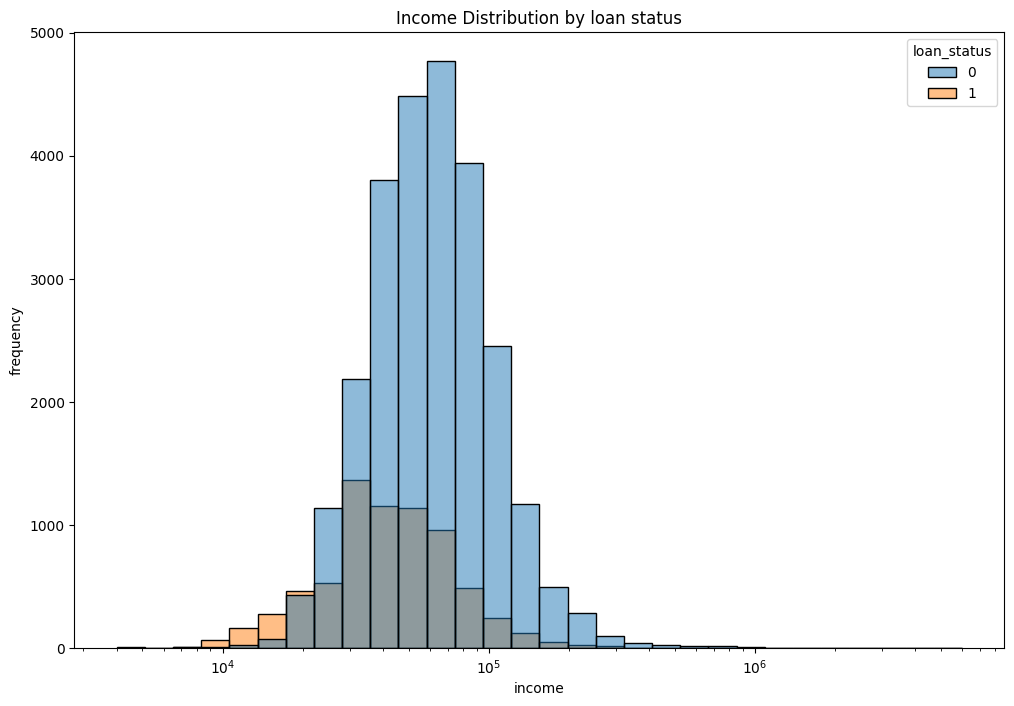

In [13]:
fig, ax = plt.subplots(figsize = (12,8))

sns.histplot(x = credit['person_income'], data=credit,  log_scale=True, hue='loan_status', ax=ax, bins = 30)
plt.title('Income Distribution by loan status')
plt.xlabel('income')
plt.ylabel('frequency')
plt.show()

From the above charts we can see both loan statuses have a right skew and both distributions are similar

### Exercise 2(d) (5 points)

Create a side-by-side boxplot of `loan_int_rate` based on `loan_grade`. Describe the chart.

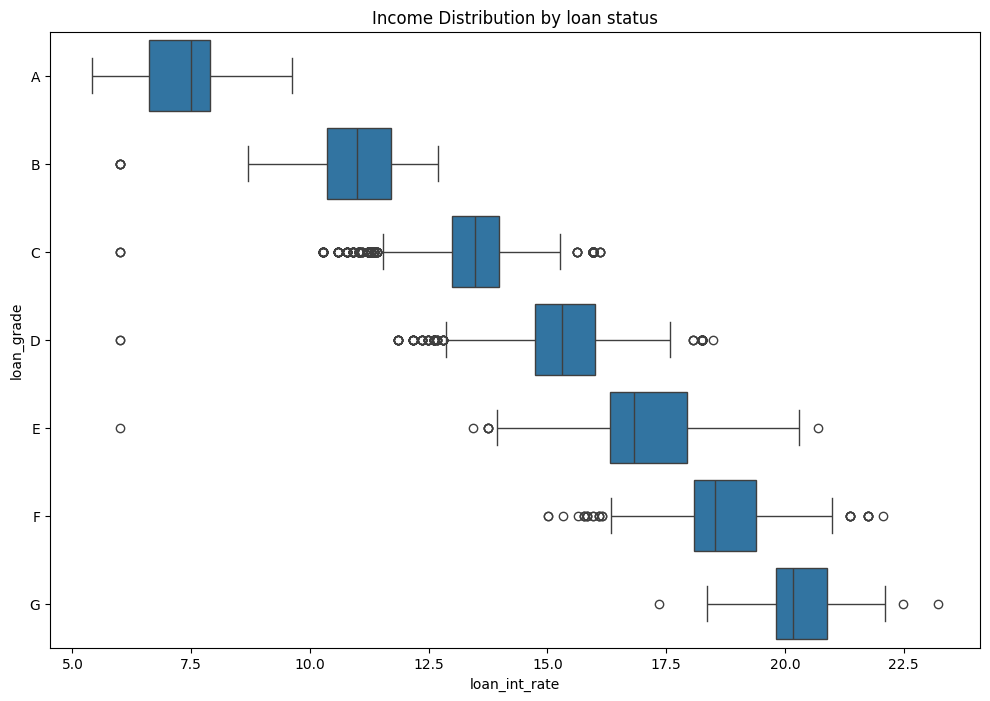

In [18]:
fig, ax = plt.subplots(figsize = (12,8))

sns.boxplot(x = credit['loan_int_rate'], y = credit['loan_grade'], data=credit, ax= ax, order=['A','B','C','D','E','F','G'])
plt.title('Income Distribution by loan status')
plt.xlabel('loan_int_rate')
plt.ylabel('loan_grade')
plt.show()

From the above chart we can see as loan grade goes from A-G loan intrest rate increases

### Exercise 2(e) (10 points)

Is there a realtionship between `person_home_ownership`, `loan_intent`, and `loan_status`? Create a heatmap that shows the average `loan_status` based on `person_home_ownership` and `loan_intent`. Describe the chart.

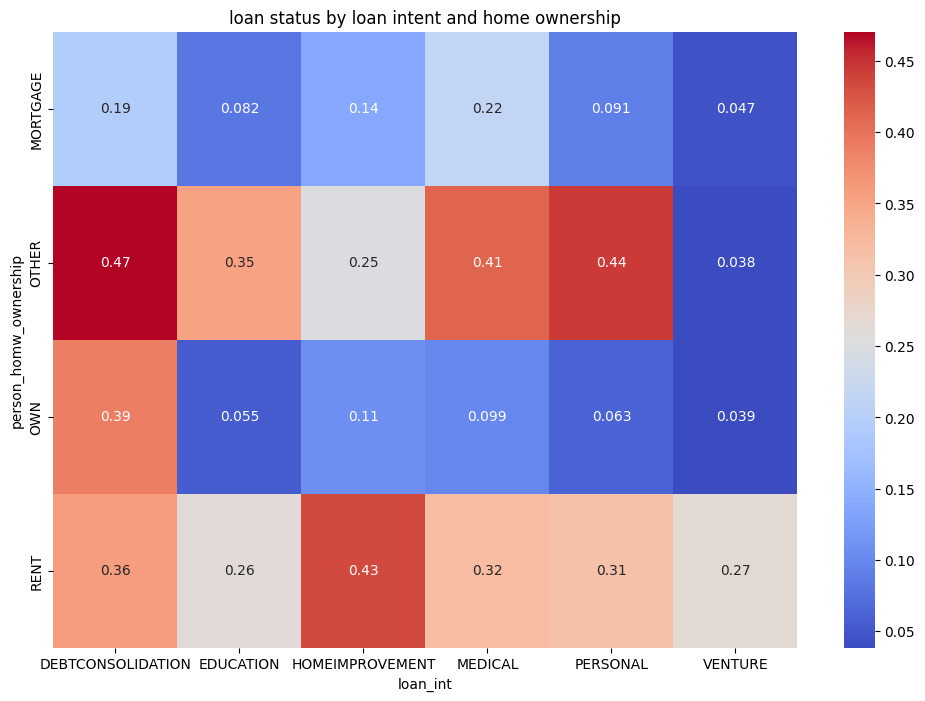

In [21]:
fig, ax = plt.subplots(figsize = (12,8))

#define catagorical features
cat_feature_1 = 'person_home_ownership'
cat_feature_2 = 'loan_intent'
score = 'loan_status'

pivot = credit.pivot_table(index=cat_feature_1, columns=cat_feature_2, values=score, aggfunc='mean')

sns.heatmap(pivot, annot=True, ax=ax, cmap='coolwarm')
plt.title('loan status by loan intent and home ownership')
plt.xlabel('loan_int')
plt.ylabel('person_homw_ownership')
plt.show()

From the above chart we can see a few high relationships between debtconsolidation and other, along with venture and mortgage